In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
def PlotPhi(axis, x, phi, t):
    # function for line plot
    axis.plot(x, phi, label = '{0:05.2f}[s]'.format(t))
    axis.set_xlim([np.min(x), np.max(x)])
    axis.set_ylim([-0.1, 1.1])
    axis.set_xlabel('x [m]')
    axis.set_ylabel('φ [-]')
    return

def ScatPhi(axis, x, phi, t):
    # function for scatter plot
    axis.scatter(x, phi, label = '{0:05.2f}[s]'.format(t))
    axis.set_xlim([np.min(x), np.max(x)])
    axis.set_ylim([-0.1, 1.1])
    axis.set_xlabel('x [m]')
    axis.set_ylabel('φ [-]')
    return

In [8]:
## Input Parameters
c = 0.25 # Speed [m/s]
x_left = -3 # left side of x coordinate[m]
x_right= 10 # right side of x coordinate[m]
x_num  = 100 # Number of Lattice points[-]
t      = 0 #simulation time[s]
dt     = 0.2# Simulation time step[s]
t_max  = 40 # time to finish simulation[s]
num_loop = 0 # Loop counter for simulation[-]
num_out  = 25# plot ever num_out time step[-]

In [9]:
## Initial Condition
x = np.linspace(x_left, x_right, x_num, endpoint=True) # x coordinate system[m]
phi_init = np.exp(-x**2) # initial distribution of phi

025th iteration, 05.00[s]
050th iteration, 10.00[s]
075th iteration, 15.00[s]
100th iteration, 20.00[s]
125th iteration, 25.00[s]
150th iteration, 30.00[s]
175th iteration, 35.00[s]


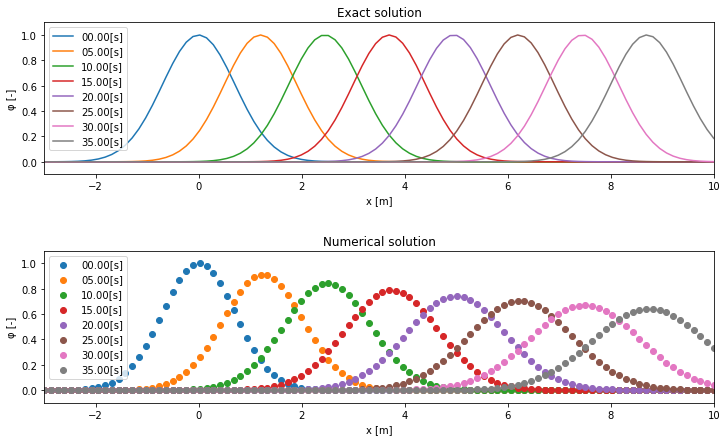

In [10]:
## Simulation
phi_old = np.copy(phi_init) # phi for nth time step
phi_new = np.copy(phi_init) # phi for n+1th time step

# figure for plot
fig = plt.figure(figsize=(12, 7))
ax_exact = fig.add_subplot(211)
ax_num   = fig.add_subplot(212)
ax_exact.set_title('Exact solution')
ax_num.set_title('Numerical solution')
fig.subplots_adjust(hspace = 0.5)
PlotPhi(ax_exact, x, phi_init, t)
ScatPhi(ax_num, x, phi_init, t)

while True:
  # numerical solution
  for i in range(1, x_num):
    phi_new[i] = phi_old[i] - c*dt*(phi_old[i]-phi_old[i-1])/(x[i]-x[i-1])
  
  # exact solution
  phi_exact = np.exp(-(x-c*t)**2) 

  # update
  phi_old[:] = phi_new[:]
  num_loop = num_loop + 1
  t      = t + dt

  # Judgement and output
  if t > t_max:
    break
  if num_loop%num_out == 0:
    print('{0:03d}th iteration, {1:05.2f}[s]'.format(num_loop, t))
    PlotPhi(ax_exact, x, phi_exact, t)
    ScatPhi(ax_num, x, phi_new, t)

ax_exact.legend(loc='upper left')
ax_num.legend(loc='upper left')
plt.show()